## 数据生成 data generation

模拟生成分类数据点

Simulate generating points of classification

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# 1. 生成训练数据 (Generate training data)
np.random.seed(42)  # 为了结果的可重复性 (For reproducibility)

train_size = 1000
train_data = np.random.rand(train_size, 1) * 1000  # 0 到 1000 范围内的随机数 (Random numbers in the range 0 to 1000)
train_labels = (train_data[:, 0] > 100).astype(int)  # 大于100为1，否则为0 (1 if greater than 100, else 0)

# 2. 生成测试数据 (Generate test data)
random_test_size = 10
random_test_data = np.random.rand(random_test_size, 1) * 1000
random_expected_labels = (random_test_data[:, 0] > 100).astype(int)

# 添加特定的测试点 (Add specific test points)
specific_test_data = np.array([[80], [90], [95], [98], [99], [101], [103], [105], [110]])
specific_expected_labels = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1])

# 合并测试数据 (Combine test data)
test_data = np.vstack((random_test_data, specific_test_data))
expected_labels = np.concatenate((random_expected_labels, specific_expected_labels))

## 梯度下降法 Gradient descent

使用梯度下降法，求解逻辑回归系数

Use the gradient descent method to solve for the coefficients of logistic regression

Standardized Coefficient: 7.52985793578635
Standardized Intercept: 10.171050652692648
Mean (μ): 490.2565533201336
Standard Deviation (σ): 291.99125673107204
Original Coefficient: 0.02578795687269997
Original Intercept: -2.47166420088549
Original Decision Boundary (Critical Value): 95.8457

预测结果 (Predictions):
Features=185.13292883861965 Expected=1 Predicted=1 Raw Prediction: 2.3025
Features=541.9009473783582 Expected=1 Predicted=1 Raw Prediction: 11.5029
Features=872.9458358764083 Expected=1 Predicted=1 Raw Prediction: 20.0398
Features=732.2248864095612 Expected=1 Predicted=1 Raw Prediction: 16.4109
Features=806.5611478614497 Expected=1 Predicted=1 Raw Prediction: 18.3279
Features=658.7833667107174 Expected=1 Predicted=1 Raw Prediction: 14.5170
Features=692.2765645178524 Expected=1 Predicted=1 Raw Prediction: 15.3807
Features=849.1956515653193 Expected=1 Predicted=1 Raw Prediction: 19.4274
Features=249.66800885918593 Expected=1 Predicted=1 Raw Prediction: 3.9668
Features=489.4249636431

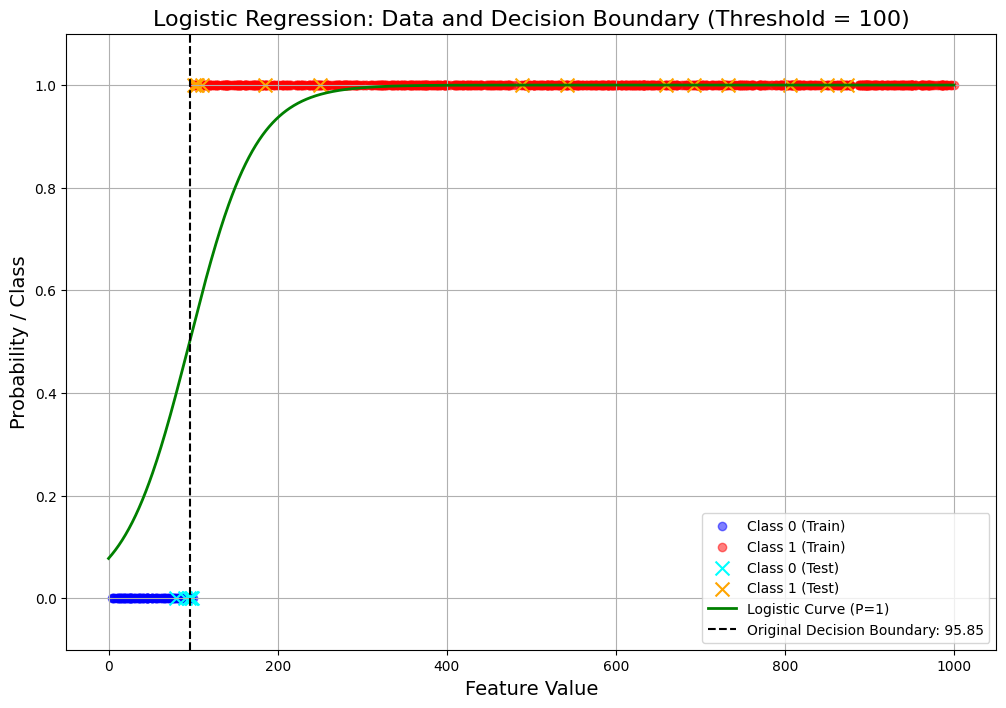

In [15]:
# 3. 标准化数据 (Standardize the data)
scaler = StandardScaler()
scaled_train_data = scaler.fit_transform(train_data)
scaled_test_data = scaler.transform(test_data)

# 4. 训练逻辑回归模型 (Train logistic regression model)
# 在使用 lbfgs 作为优化器时，学习率（步长）是由算法内部动态管理的，无需用户手动设置。
# When using lbfgs as the optimizer, the learning rate (step size) is dynamically managed by the algorithm internally, and there is no need for the user to set it manually.
model = LogisticRegression(solver='lbfgs', max_iter=10000)
model.fit(scaled_train_data, train_labels)

# 5. 获取标准化后的系数和截距 (Get standardized coefficient and intercept)
standard_coef = model.coef_[0][0]
standard_intercept = model.intercept_[0]
print(f"Standardized Coefficient: {standard_coef}")
print(f"Standardized Intercept: {standard_intercept}")

# 6. 获取标准化的均值和标准差 (Get mean and standard deviation of standardized data)
mean = scaler.mean_[0]
std = scaler.scale_[0]
print(f"Mean (μ): {mean}")
print(f"Standard Deviation (σ): {std}")

# 7. 还原到原始数据的系数和截距 (Restore coefficient and intercept to original scale)
original_coef = standard_coef / std
original_intercept = standard_intercept - (standard_coef * mean / std)
print(f"Original Coefficient: {original_coef}")
print(f"Original Intercept: {original_intercept}")

# 8. 计算原始数据下的决策边界 (Calculate decision boundary in original scale)
decision_boundary_original = -original_intercept / original_coef
print(f"Original Decision Boundary (Critical Value): {decision_boundary_original:.4f}")

# 9. 使用模型进行预测 (Make predictions with the model)
predictions = model.predict(scaled_test_data)
raw_predictions = model.decision_function(scaled_test_data)

# 输出预测结果 (Print prediction results)
print("\n预测结果 (Predictions):")
for features, expected, predicted, raw_pred in zip(test_data, expected_labels, predictions, raw_predictions):
    print(f"Features={features[0]:<10} Expected={expected} Predicted={predicted} Raw Prediction: {raw_pred:.4f}")

# 10. 绘制图形 (Plot the figure)
plt.figure(figsize=(12, 8))

# 绘制训练数据 (Plot training data)
plt.scatter(train_data[train_labels == 0], np.zeros_like(train_data[train_labels == 0]),
            color='blue', alpha=0.5, label='Class 0 (Train)')
plt.scatter(train_data[train_labels == 1], np.ones_like(train_data[train_labels == 1]),
            color='red', alpha=0.5, label='Class 1 (Train)')

# 绘制测试数据 (Plot test data)
plt.scatter(test_data[expected_labels == 0], np.zeros_like(test_data[expected_labels == 0]),
            color='cyan', marker='x', s=100, label='Class 0 (Test)')
plt.scatter(test_data[expected_labels == 1], np.ones_like(test_data[expected_labels == 1]),
            color='orange', marker='x', s=100, label='Class 1 (Test)')

# 绘制分类边界 (Plot decision boundary)
x_vals = np.linspace(0, 1000, 1000).reshape(-1, 1)
scaled_x_vals = scaler.transform(x_vals)
predicted_probs = model.predict_proba(scaled_x_vals)[:, 1]

plt.plot(x_vals, predicted_probs, color='green', label='Logistic Curve (P=1)', linewidth=2)

# 绘制原始决策边界 (Plot original decision boundary)
plt.axvline(x=decision_boundary_original, color='black', linestyle='--',
            label=f'Original Decision Boundary: {decision_boundary_original:.2f}')

# 设置图例和标签 (Set legend and labels)
plt.title("Logistic Regression: Data and Decision Boundary (Threshold = 100)", fontsize=16)
plt.xlabel("Feature Value", fontsize=14)
plt.ylabel("Probability / Class", fontsize=14)
plt.legend(loc="best")
plt.grid(True)
plt.ylim(-0.1, 1.1)  # 调整y轴范围以更好地显示概率曲线 (Adjust y-axis range for better display of probability curve)

# 显示图形 (Show the plot)
plt.show()